Dependencia con la longitud del conjunto de entrenamiento - Sobreajuste: Genere datasets usando el código desarrollado en el punto a) de la práctica 0 (vamos a llamar a estos datos "diagonal", y a los descriptos en el punto b) "paralelo"), con C = 0.78 y d = 2. Genere un único conjunto de test con n = 10000. Genere 20 conjuntos de entrenamiento para cada uno de los siguientes valores de n: 125, 250, 500, 1000, 2000, 4000. Entrene árboles sobre estos conjuntos y guarde los resultados de error (1-accuracy) sobre los datos de entrenamiento y sobre el conjunto de test, como así también el tamaño del árbol (atributo tree_.node_count). En primer lugar genera una gráfica de las predicciones sobre los datos de test (plot x-y con colores para las clases) para un ejemplo de cada tamaño de conjunto de entrenamiento. Comente lo que se puede observar. También genere dos gráficas: la primer gráfica tiene el training error y test error, y la segunda la cantidad de nodos en el árbol, todos como función de la longitud del conjunto de entrenamiento (utilice siempre el promedio de los 20 conjuntos de cada longitud dada). Sugerencia: usar escala logarítmica en el eje x, de la cantidad de datos. Finalmente, repita todo el procedimiento completo usando como generador de datos el "paralelo". Incluya los resultados correspondientes en las mismas gráficas del diagonal. Discuta los resultados.

In [2]:
import numpy as np 
import matplotlib.pylab as plt
import pandas as pd
from distribuciones import diagonal, paralelo
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.datasets import load_iris 
from sklearn import tree 

In [4]:
d = 2
n_test  = 10000
C = 0.78
N_train_values = [125, 250, 500, 1000, 2000, 4000]

# Dist Diagonal

In [5]:
error_training = np.zeros([len(N_train_values)])
error_test = np.zeros([len(N_train_values)])

k = 0
testdiag = diagonal(d,n_test,C)

for n_train in N_train_values:
    
    
    dtrain = diagonal(d,n_train,C)
    y = dtrain['clases'].values
    X = dtrain.drop(['clases'],axis = 1).values
    clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
    clf.fit(X, y)
        
    prediccion_training = clf.predict(X)
    correctos, = np.where(prediccion_training == y)
    accuracy = len(correctos)/len(y)
    error_training[k] = 1 - accuracy
        
    test = testdiag.drop(['clases'],axis = 1).values
    prediccion_test = clf.predict(test)
    correctos, = np.where(prediccion_test == testdiag['clases'].values)
    accuracy = len(correctos)/len(test)
    error_test[k] = 1 - accuracy
    
    
        
    k = k + 1

In [54]:
error_mean_training = np.zeros(len(C_values))
for i in range(len(C_values)):
    error_mean_training[i] = np.mean(error_training[i,:])

error_mean_test = np.zeros(len(C_values))
for i in range(len(C_values)):
    error_mean_test[i] = np.mean(error_test[i,:])

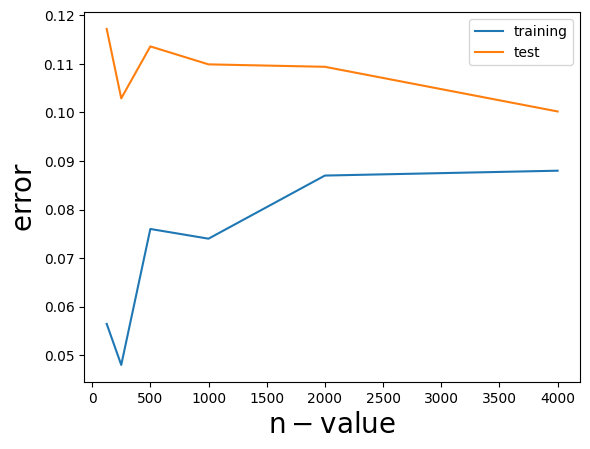

In [7]:
plt.plot(N_train_values,error_training,label='training')
plt.plot(N_train_values,error_test,label='test')
plt.xlabel('$\\rm n-value$',size=20)
plt.ylabel('$\\rm error$',size=20)

plt.legend()

3.1 Opcional:
Puede calcular para cada valor de C cuál es el mínimo error que se puede conseguir? Cómo se comparan dichos valores con los obtenidos con el árbol? Obtenga una curva de error mínimo y agréguela a la gráfica anterior. Explique brevemente cómo obtuvo los valores mínimos.
Hay varias maneras de hacerlo. Una simple es imaginando cual es el clasificador ideal o de mínimo error para este problema (a ese clasificador se lo llama "clasificador de Bayes") y midiendo directamente sobre un conjunto de test grande (10000 puntos para d=5) cuántos puntos son mal clasificados por ese clasificador ideal.



In [56]:
# para calcular el error minimo puedo pensar en las gausseanas como distribuciones de probabilidad y 
# pensar un clasificador que evalue cuando vale cada gausseana (de las 2 clases) en cada punto y 
# asignar los puntos proporcionalmente al valor de cada gauseana

from scipy.stats import multivariate_normal
import random

def generate_random_number(A, B):

    #Genera un número aleatorio que puede ser 1 con una probabilidad A y 0 con una probabilidad B.
    
    r = random.random()  # Genera un número aleatorio entre 0 y 1
    
    if r < A:
        return 1
    else:
        return 0

def diagonal_teorica(x,d,C):

    center0 = np.ones(d)*-1
    mcov0   = np.eye(d)*C*np.sqrt(d)
    gaussian0 = multivariate_normal.pdf(x, mean=center0, cov=mcov0)

    
    center1 = np.ones(d)
    mcov1   = np.eye(d)*C*np.sqrt(d)
    gaussian1 = multivariate_normal.pdf(x, mean=center1, cov=mcov1)

    p0 = gaussian0/(gaussian0 + gaussian1)
    p1 = gaussian1/(gaussian0 + gaussian1)
    
    clase = generate_random_number(p1,p0)
    return clase
    #if gaussian0>gaussian1:
   #     return 0
    #if gaussian1>gaussian0:
    #    return 1
    #if gaussian1 == gaussian0:
    #    random_number = random.choice([0, 1])
    #    return random_number
    
    

In [57]:
x1 = 0.03
x2 = 0.2

p2 = x2/(x1+x2)
p1 = x1/(x1+x2)

print(p1,p2,p1+p2)

0.13043478260869565 0.8695652173913043 1.0


In [87]:
dtrain = diagonal(d,n_train*100,C*0.1)
X = dtrain.drop(['clases'],axis = 1).values


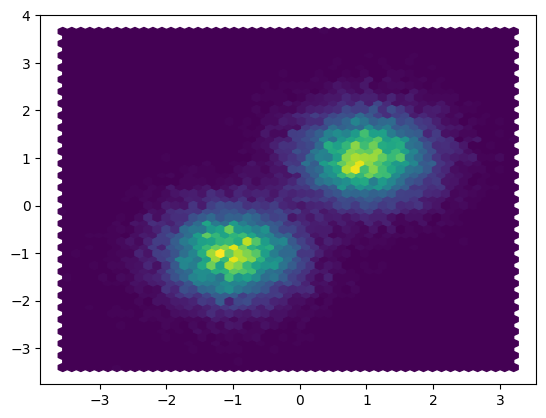

In [88]:
plt.hexbin(X[:,0],X[:,1],gridsize=50)

In [103]:
X=([-0,-0])
k = 0
for i in range(10000):
    asd = diagonal_teorica(X,d,C*0.1)
    if asd == 0:
        k = k + 1
        
k

5009

In [58]:
error_bayes = np.zeros(len(C_values))

k = 0 
for C in C_values:
    
    testdiag = diagonal(d,10000,C)
    
    #dtrain = diagonal(d,n_train,C)
    y = testdiag['clases'].values
    X = testdiag.drop(['clases'],axis = 1).values
    
    #clf = GaussianNB()
    #clf.fit(X,y)
    prediccion_bayes = []
    for i in range(len(X)):
        #print(C,diagonal_teorica(X[i,:],d,C))
        prediccion_bayes.append(diagonal_teorica(X[i,:],d,C))
    
    prediccion_bayes = np.array(prediccion_bayes)
    correctos, = np.where(prediccion_bayes == y)
    accuracy = len(correctos)/len(y)
    error_bayes[k] = 1 - accuracy
        
    k = k + 1

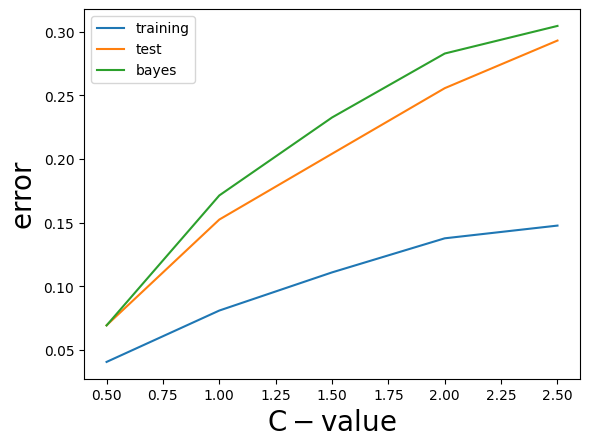

In [59]:
plt.plot(C_values,error_mean_training,label='training')
plt.plot(C_values,error_mean_test,label='test')
plt.plot(C_values,error_bayes,label='bayes')
plt.xlabel('$\\rm C-value$',size=20)
plt.ylabel('$\\rm error$',size=20)

plt.legend()